In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm

%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.family':'sans-serif'})
plt.rcParams.update({'font.sans-serif':['Helvetica']})
plt.rcParams.update({'axes.titlesize':'medium'})

savefig_params = {"dpi": 300,
                  "bbox_inches": "tight"}

# 1D Ising model example

1D lattice of spins (periodic).
Each spin has a magnetic dipole moment of +1 or -1.


In [2]:
def energy(c, J):
    """Energy of a 1D Ising model.
    
    Calculates \sum_{ij} J \sigma_i \sigma_j
    
    Args:
        c (np.ndarray): 1D numpy array describing this configuration
                        of up / down spins (+1 / -1).
        J (float): Interaction energy.
        
    Returns:
        (float)
        
    """
    return np.sum(-J * c * np.roll(c,1))

In [3]:
from scipy.constants import physical_constants
k_in_eV = physical_constants['Boltzmann constant in eV/K'][0]

In [4]:
def accept_move(delta_E, temperature):
    """Accept a """
    if temperature < 0.0:
        raise ValueError("Temperature must be non-negative.")
    if delta_E <= 0.0:
        return True
    else:
        if temperature == 0.0:
            return False
        else:
            return np.random.random() < np.exp(-delta_E / (k_in_eV * temperature))

In [5]:
n_spins = 4

J = 0.012 # Ferromagentic ordering at 0 K.

n_steps = 50000
T_range = np.arange(0, 2000, 50)
mag_predicted = []
for T in tqdm(T_range):
    c = np.random.choice([-1.0, +1.0], n_spins)
    mag = []
    # equilibrate
    for i in range(250):
        mag.append(np.abs(np.sum(c)))
        # choose a random element in our configuration
        index = np.random.choice(c.shape[0])
        # generate our proposed move
        c_proposed = c.copy()
        c_proposed[index] *= -1.0
        delta_E = energy(c_proposed, J) - energy(c, J)
        if accept_move(delta_E, T):
            c = c_proposed.copy()
    # production
    for i in tqdm(range(n_steps), leave=False):
        mag.append(np.abs(np.sum(c)))
        # choose a random element in our configuration
        index = np.random.choice(c.shape[0])
        # generate our proposed move
        c_proposed = c.copy()
        c_proposed[index] *= -1.0
        delta_E = energy(c_proposed, J) - energy(c, J)
        if accept_move(delta_E, T):
            c = c_proposed.copy()
    mag_predicted.append(np.mean(mag))


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

In [6]:
# Compute the exact result by summing over all possible states,
# weighted by their probabilities

energies = np.array([-4, 0, 0, +4]) * J
degeneracies = np.array([2, 8, 4, 2])
magnetisation = np.array([4, 2, 0, 0])

def boltzmann_factor(g, e, T):
    return g * np.exp(-e/(k_in_eV*T))

def partition_function(degeneracies, energies, T):
    Z = np.sum(boltzmann_factor(degeneracies, energies - energies[0], T))
    return Z

def total_mag(energies, degeneracies, magnetisation, T):
    Z = partition_function(degeneracies, energies, T)
    total_mag = 0.0
    for e, g, m in zip(energies, degeneracies, magnetisation):
        total_mag += m * boltzmann_factor(g, e - energies[0], T) / Z
    return total_mag

exact_mag = []
for T in np.arange(10, 2000, 10):
    exact_mag.append(total_mag(energies, degeneracies, magnetisation, T))

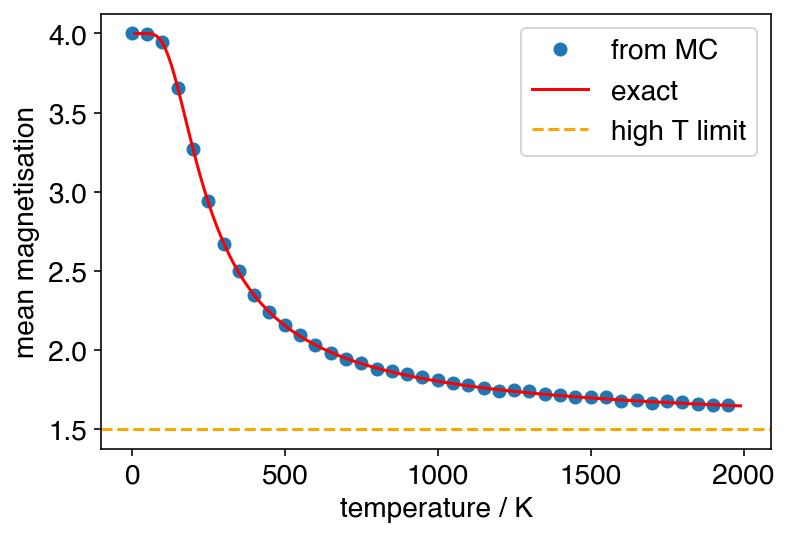

In [7]:
plt.plot(T_range, np.array(mag_predicted), 'o', label='from MC')
plt.xlabel("temperature / K")
plt.ylabel("mean magnetisation")
plt.plot(np.arange(10, 2000, 10), exact_mag, '-', color="red", label="exact")
plt.axhline(1.5, linestyle="--", color="orange", label="high T limit")
plt.legend()
plt.savefig('figures/ising_example.pdf', **savefig_params)
plt.show()